In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Regular_1(L,Inh):
    L2=L*L
    Matrix=np.zeros((L2,L2),int)
    rng=np.random.default_rng(seed=1)
    for i in range(L):
        for j in range(L):
            ia=i
            ji=j
            id=i
            jd=j
            if ia+1==L:
                ia=-1
            if id==0:
                id=L
            if jd+1==L:
                jd=-1
            if ji==0:
                ji=L
            I=rng.uniform(0.0, 1.0)
            if I<Inh:
                I=0
            else :
                I=1
            Matrix[i*L+j][i*L+jd+1]=1*(2*I-1)## derecha I=0 -1,I=1 1
            I=rng.uniform(0.0, 1.0)
            if I<Inh:
                I=0
            else:
                I=1
            Matrix[i*L+j][i*L+ji-1]=-1*(2*I-1)## izquieda
            I=rng.uniform(0.0, 1.0)
            if I<Inh:
                I=0
            else:
                I=1
            Matrix[i*L+j][(ia+1)*L+j]=-1*(2*I-1)## arriba 
            I=rng.uniform(0.0, 1.0)
            if I<Inh:
                I=0
            else: 
                I=1
            Matrix[i*L+j][(id-1)*L+j]=-1*(2*I-1)# Abajo
    return Matrix

def small_word_Bi(L,P,Inh):
    Matrix=Regular_1(L,Inh)
    rng=np.random.default_rng(seed=1)
    for i in range(L*L):
        for j in range(L*L):
            if Matrix[i][j]==1 and rng.uniform(0.0, 1.0)<P:
                Matrix[i][j]==0
                Matrix[j][i]==0
                jj=rng.integers(0,L*L-1)
                if jj==i or jj==j:
                    jj=rng.integers(0,L*L-1)
                    Matrix[jj][i]=2
                    Matrix[i][jj]=2
                else:
                    Matrix[jj][i]=2
                    Matrix[i][jj]=2
            elif Matrix[i][j]==-1 and rng.uniform(0.0, 1.0)<P:
                Matrix[i][j]==0
                Matrix[j][i]==0
                jj=rng.integers(0,L*L-1)
                if jj==i or jj==j:
                    jj=rng.integers(0,L*L-1)
                    Matrix[jj][i]=-2
                    Matrix[i][jj]=-2
                else:
                    Matrix[jj][i]=-2
                    Matrix[i][jj]=-2
    for i in range(L*L):
        for j in range(L*L):
            if Matrix[i][j]==2:
                Matrix[i][j]=1
                Matrix[j][i]=1
            elif Matrix[i][j]==-2:
                Matrix[i][j]=-1
                Matrix[j][i]=-1
    return Matrix

def Random_bi(L,  P,  Inh):
    matrix=np.zeros((L*L,L*L),int)
    rng=np.random.default_rng(seed=1)
    for i in range(L*L):
        for j in range(L*L):
            I=rng.uniform(0.0,1.0)
            if I<Inh:
                I=0
            else:
                I=1
            if (matrix[i][j]!=1 or matrix[i][j]!=-1) and rng.uniform(0.0,1.0)<P:
            
                matrix[i][j]=-1*(2*I-1)
                matrix[j][i]=-1*(2*I-1)
    return matrix   
    

In [17]:
class EGG:
    def __init__(self, Trest, Trelative, Alpha, L, Matrix,t):
        self.Trest = Trest
        self.Trelative = Trelative  
        self.Alpha = Alpha  # Velocity in y direction
        self.L2 = L * L  # Distribution functions
        self.Matrix = Matrix
        self.AP = np.zeros(self.L2)  # Initialize AP array with zeros
        self.Aux = np.zeros(self.L2)
        self.rng = np.random.default_rng(seed=1)
        self.T=t
        self.datos=np.zeros((int(t),2))


    def start(self):
        rng = np.random.default_rng(seed=1)
        for ix in range(self.L2):
            potencial = self.rng.uniform(0.0, 1.0)
            if potencial < 0.2: 
                self.AP[ix] = 0
            elif potencial >= 0.2 and potencial < 0.3:
                self.AP[ix] = 1
            elif potencial >= 0.3 and potencial < 0.4:
                self.AP[ix] = 2
            elif potencial >= 0.4 and potencial < 0.5:
                self.AP[ix] = 3
            elif potencial >= 0.5 and potencial < 0.6:
                self.AP[ix] = 4
            elif potencial >= 0.6 and potencial < 0.65:
                self.AP[ix] = 5
            elif potencial >= 0.65 and potencial < 0.72:
                self.AP[ix] = 6
            elif potencial >= 0.72 and potencial < 0.79:
                self.AP[ix] = 7
            elif potencial >= 0.79 and potencial < 0.86:
                self.AP[ix] = 8
            elif potencial >= 0.86 and potencial < 0.93:
                self.AP[ix] = 9
            elif potencial >= 0.93:
                self.AP[ix] = 10

    def Cual_Estado(self, ix):
        if self.AP[ix] == 0:
            return "Reposo"
        elif 1 <= self.AP[ix] <= 4:
            return "Activado"
        elif self.AP[ix] == 5:
            return "hyperpolarizado"
        elif 6 <= self.AP[ix] <= 10:
            return "refractario"

    def Reglas(self, ix):
        Sconexion = ""
        Ca = Ce = Ci = Ch = 0.0

        for i in range(self.L2):
            if self.Matrix[ix][i] or self.Matrix[ix][i] == -1:
                Sconexion = self.Cual_Estado(i)
                if Sconexion == "Activado":
                    if self.Matrix[ix][i] == -1:
                        Ci += 1
                    else:
                        Ce += 1
                elif Sconexion == "hyperpolarizado":
                    Ch += 1
        Ca = Ce - Ci - self.Alpha * Ch
        return Ca

    def Potencial(self, ix):
        St = self.Cual_Estado(ix)
        if St == "Reposo":
            potencial = -70
        elif St == "Activado":
            potencial = 45  # Default value if key not found
        elif St == "hyperpolarizado":
            potencial = -90
        elif St == "refractario":
            potencial = -75
        return potencial

    def Paso_temporal(self):
        potencial_t = 0.0
        Ca = 0.0
        Sa = ""
        for ix in range(self.L2):
            potencial_t += self.Potencial(ix)
            Sa = self.Cual_Estado(ix)
            if Sa == "Activado":
                Ca += 1
        return Ca, potencial_t

    def Evolucion(self):
        St = ""
        Ct = 0
        for ix in range(self.L2):
            St = self.Cual_Estado(ix)
            if St == "Reposo":
                if self.Reglas(ix) >= self.Trest:
                    self.Aux[ix] = self.AP[ix] + 1
                else:
                    self.Aux[ix] = 0
            elif St == "Activado" or St == "hyperpolarizado":
                self.Aux[ix]=self.AP[ix] + 1
            elif St == "refractario":
                if self.Reglas(ix) >= self.Trelative:
                    self.Aux[ix] = 1
                else:
                    if self.AP[ix] == 10:
                        self.Aux[ix] = 0
                    else:
                        self.Aux[ix] = self.AP[ix] + 1
        self.AP = self.Aux
    def Simulacion(self):
        for i in range(int(self.T)):
            self.datos[i]=self.Paso_temporal()
            self.Evolucion()

In [20]:
L, P, inh, Trest, Trelative, Alpha, t = np.loadtxt("input.txt", unpack=True)
Matrix=Regular_1(int(L),inh)
F1=EGG(Trest, Trelative, Alpha, int(L), Matrix,100)
F1.start()


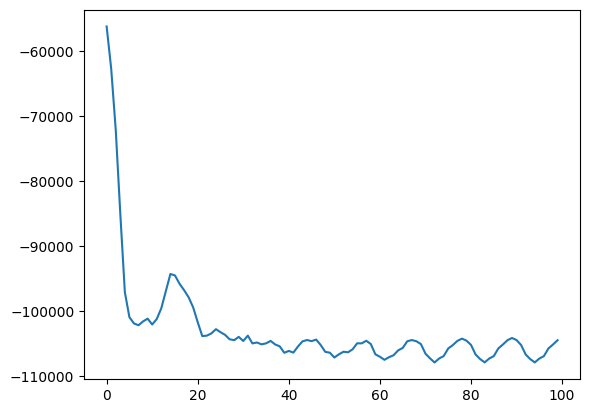

In [19]:
plt.plot(F1.datos[:,1])

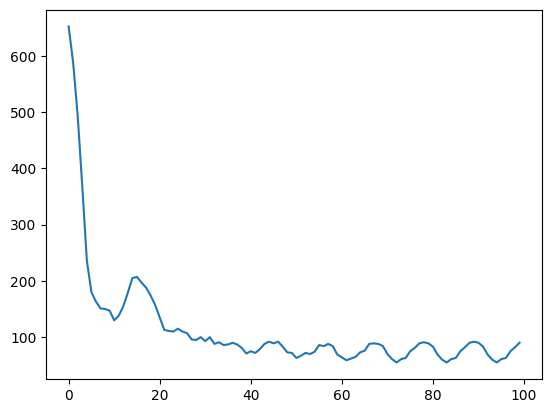

In [15]:

plt.plot(F1.datos[:,0])

